In [115]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
from scipy.stats import binom

* d = distance to the target
* h = number of activated hardlocations
* s = total stored bitstrings
* H = number of hardlocations
* w = number of times the target bitstring has been written

In [133]:
_phi_fn_cache = {}

In [134]:
def phi_fn(n, H, r, d, steps=500):
    key = (n, H, r, d, steps)
    if key in _phi_fn_cache:
        return _phi_fn_cache[key]
    v = []
    for _ in range(steps):
        bs1 = sdmlib.Bitstring.init_random(n)
        bs2 = bs1.copy()
        bs2.flip_random_bits(d)
        selected1 = address_space.scan_thread2(bs1, r)
        selected2 = address_space.scan_thread2(bs2, r)
        x = len(set(selected1) & set(selected2))
        v.append(x)
    mu = 1.0*sum(v)/len(v)
    _phi_fn_cache[key] = mu
    return mu

In [135]:
def prob_wrong_bit0(h, H, s, w, d, phi, theta):
    x = 1.0*s*h*h/(2*H)
    return 1 - binom.cdf(x, theta, 0.5)

In [136]:
def prob_wrong_bit1(h, H, s, w, d, phi, theta):
    x = s*h*h/(2*H)-w*phi
    return binom.cdf(x, theta, 0.5)

In [137]:
def prob_wrong(n, h, H, s, w, d):
    phi = phi_fn(n, H, r, d)
    theta = 1.0*s*h*h/H - w*phi
    p0 = prob_wrong_bit0(h, H, s, w, d, phi, theta)
    p1 = prob_wrong_bit1(h, H, s, w, d, phi, theta)
    return (p0+p1)/2.0

In [138]:
address_space = sdmlib.AddressSpace.init_random(n, H)
n = 1000
r = 451
H = 1000000
s = 10000
w = 2
d = 230
p = utils.calculate_probability(n, r)
h = p*H

In [143]:
x = prob_wrong(n=n, h=h, H=H, s=s, w=w, d=d)

In [144]:
print('result', x)
print('goal', 1.0*d/n)
print('error', x - 1.0*d/n)

result 0.0808750589509585
goal 0.23
error -0.1491249410490415


In [114]:
distances = list(range(270, 310))
y_values = []
err_values = []
for d in distances:
    print('Calculating for d={}... '.format(d), end='')
    y = prob_wrong(n=n, h=h, H=H, s=s, w=w, d=d)
    err = abs(y - 1.0*d/n)
    print(y, err)
    y_values.append(y)
    err_values.append(err)

Calculating for d=270... 0.191828998301823 0.078171001698177
Calculating for d=271... 0.1918289983022903 0.07917100169770971
Calculating for d=272... 0.19700544915438 0.07499455084562001
Calculating for d=273... 

KeyboardInterrupt: 

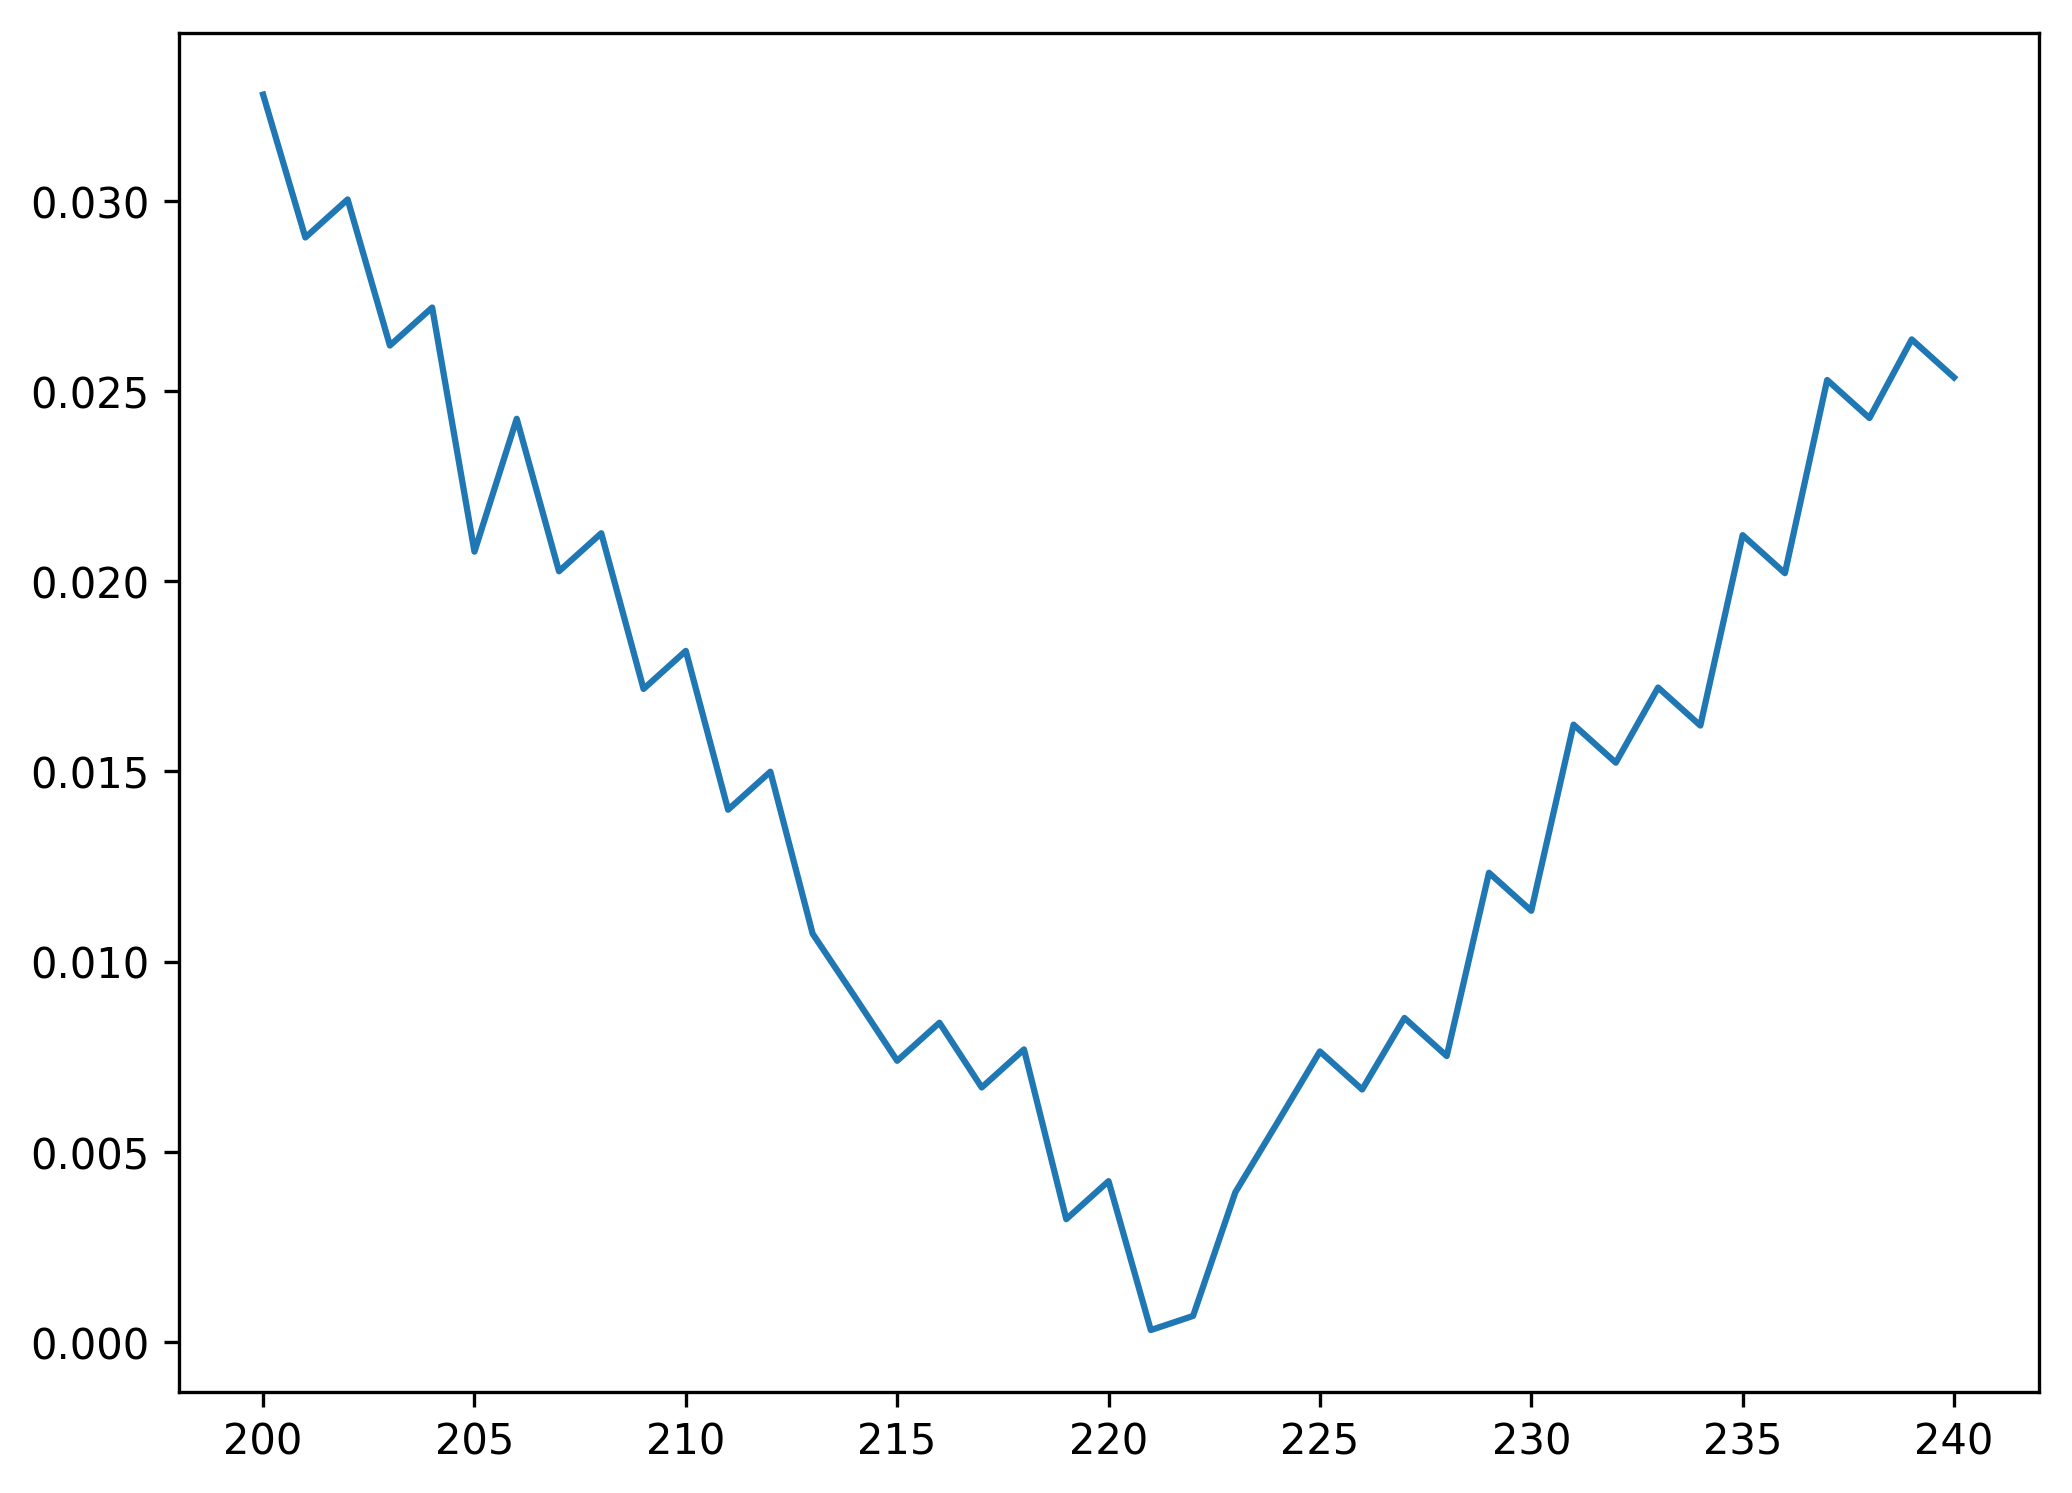

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(distances, err_values)
plt.show()